In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler

In [84]:
df_games = pd.read_csv('games_c4.csv')
df_games = df_games.iloc[:, 1:]
df_games.head()

,AppID,QueryName,DeveloperCount,Unnamed: 11,RecommendationCount,PublisherCount,SteamSpyOwners,SteamSpyPlayersEstimate,Unnamed: 20,Unnamed: 21,...,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent,rating,TotalReviews,ReviewScore,CustomRating,Sales
0,10,Counter-Strike,1,NaN,68991,1,13033334,9140731,NaN,NaN,...,"{'Action': 5472, 'FPS': 4897, 'Multiplayer': 3...",96.0,149589.0,95.0,908.0,97.458003,236979.0,0.974580,-5.349292,1.302030e+08
1,20,Team Fortress Classic,1,NaN,2439,1,5399140,753627,NaN,NaN,...,"{'Action': 763, 'FPS': 327, 'Multiplayer': 277...",86.0,6045.0,89.0,64.0,86.873772,8144.0,0.868738,-3.779629,2.694171e+07
2,30,Day of Defeat,1,NaN,2319,1,7621102,1709740,NaN,NaN,...,"{'FPS': 798, 'World War II': 270, 'Multiplayer...",87.0,4038.0,97.0,36.0,90.150843,6762.0,0.901508,-3.731648,3.802930e+07
3,40,Deathmatch Classic,1,NaN,888,1,7498965,789676,NaN,NaN,...,"{'Action': 635, 'FPS': 150, 'Classic': 115, 'M...",81.0,2120.0,95.0,21.0,82.588076,2952.0,0.825881,-3.296144,3.741984e+07
4,50,Half-Life: Opposing Force,1,NaN,2934,1,5399499,705741,NaN,NaN,...,"{'FPS': 916, 'Action': 350, 'Classic': 281, 'S...",95.0,18994.0,95.0,269.0,95.188645,22052.0,0.951886,-4.295354,2.694350e+07


In [85]:
df_games.columns

Index(['AppID', 'QueryName', 'DeveloperCount', 'Unnamed: 11',
       'RecommendationCount', 'PublisherCount', 'SteamSpyOwners',
       'SteamSpyPlayersEstimate', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 23',
       'PurchaseAvail', 'Unnamed: 25', 'PlatformWindows',
       'CategorySinglePlayer', 'GenreIsAction', 'GenreIsAdventure',
       'GenreIsCasual', 'PriceCurrency', 'ShortDescrip', 'DetailedDescrip',
       'PCMinReqsText', 'Release date', 'DLC count', 'Windows',
       'Metacritic score', 'Achievements', 'Recommendations', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Year', 'Month', 'Day',
       'Adventure', 'Casual', 'Indie', 'RPG', 'Free To Play', 'Action',
       'Strategy', 'Simulation', 'Racing', 'Sports', 'Massively Multiplayer',
       'Education', 'Violent', 'Design & Illustration', 'Animation & Modeling',
       'Co-op', 'Cross-Platform Multiplayer', 'Family Sharing',
       'HDR available', 'In-App Purchases', 'Multi-player', 'Online PvP',
       'PvP', 

In [86]:
df_games= df_games.drop(columns=[
    'AppID', 'QueryName',
    'Unnamed: 11', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 23', 'Unnamed: 25',
    'Developers', 'developers',  # Developer related columns
    'Publishers', 'publishers',  # Publisher related columns
    'PriceCurrency',  # Price related
    'Recommendations',  # Reviews and ratings
    'DLC count',  # Redundant DLC count
    'Categories',  # Redundant category
    'Single-player',  # Redundant category
    'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',  # Specific genres
    'PlatformWindows', 'ShortDescrip', 'DetailedDescrip',
    'PCMinReqsText', 'Release date', 'Windows', 'Genres', 'Day',
    # 'Cross-Platform', 'Multiplayer',
    'Online PvP', 'PvP', 'VR Supported', 'about_the_game', 'packages', 'categories',
    'genres', 'tags', 'pct_pos_total', 'pct_pos_recent', 'num_reviews_recent', 'CustomRating',
    'Metacritic score',
    'num_reviews_total'
])

In [87]:
df_games.columns

Index(['DeveloperCount', 'RecommendationCount', 'PublisherCount',
       'SteamSpyOwners', 'SteamSpyPlayersEstimate', 'PurchaseAvail',
       'CategorySinglePlayer', 'Achievements', 'Year', 'Month', 'Adventure',
       'Casual', 'Indie', 'RPG', 'Free To Play', 'Action', 'Strategy',
       'Simulation', 'Racing', 'Sports', 'Massively Multiplayer', 'Education',
       'Violent', 'Design & Illustration', 'Animation & Modeling', 'Co-op',
       'Cross-Platform Multiplayer', 'Family Sharing', 'HDR available',
       'In-App Purchases', 'Multi-player', 'VR Support', 'age_ranking',
       'Price', 'dlc_count', 'positive', 'negative', 'rating', 'TotalReviews',
       'ReviewScore', 'Sales'],
      dtype='object')

In [88]:
len(df_games)

13303

In [89]:
df_games.iloc[:,20:].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13303 entries, 0 to 13302
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Massively Multiplayer       9811 non-null   float64
 1   Education                   9811 non-null   float64
 2   Violent                     9811 non-null   float64
 3   Design & Illustration       9811 non-null   float64
 4   Animation & Modeling        9811 non-null   float64
 5   Co-op                       9811 non-null   float64
 6   Cross-Platform Multiplayer  9811 non-null   float64
 7   Family Sharing              9811 non-null   float64
 8   HDR available               9811 non-null   float64
 9   In-App Purchases            9811 non-null   float64
 10  Multi-player                9811 non-null   float64
 11  VR Support                  9811 non-null   float64
 12  age_ranking                 9811 non-null   float64
 13  Price                       108

# Data Cleaning

## Zero replacement

In [90]:
zero_columns = ['Achievements', 'Price', 'dlc_count'] + list(df_games.iloc[:, 10:32].columns)

df_games[zero_columns] = df_games[zero_columns].fillna(0)

## Most Frequent

In [91]:
import numpy as np
from datetime import datetime

# Assuming df_games is the dataset, current year for calculating year difference
current_year = datetime.now().year

# Fill 'Year' with the most frequent year and calculate (current_year - Year)
most_frequent_year = df_games['Year'].mode()[0]
df_games['Year'] = df_games['Year'].fillna(most_frequent_year)
df_games['YearDifference'] = current_year - df_games['Year']

# Fill 'Month' with the most frequent month and create sin and cos transformations
most_frequent_month = df_games['Month'].mode()[0]
df_games['Month'] = df_games['Month'].fillna(most_frequent_month)

# Creating sin and cos transformations for cyclical month representation
df_games['Month_sin'] = np.sin(2 * np.pi * df_games['Month'] / 12)
df_games['Month_cos'] = np.cos(2 * np.pi * df_games['Month'] / 12)

df_games.drop(columns=['Year', 'Month'], inplace=True)


## Average

In [92]:
imp_mean = SimpleImputer(strategy='mean')
mean_feats = ['age_ranking', 'rating', 'ReviewScore']

df_games[mean_feats] = imp_mean.fit_transform(df_games[mean_feats])

df_games.head()

,DeveloperCount,RecommendationCount,PublisherCount,SteamSpyOwners,SteamSpyPlayersEstimate,PurchaseAvail,CategorySinglePlayer,Achievements,Adventure,Casual,...,dlc_count,positive,negative,rating,TotalReviews,ReviewScore,Sales,YearDifference,Month_sin,Month_cos
0,1,68991,1,13033334,9140731,True,False,0.0,0.0,0.0,...,0.0,230955.0,6024.0,97.458003,236979.0,0.974580,1.302030e+08,24.0,-5.000000e-01,0.866025
1,1,2439,1,5399140,753627,True,False,0.0,0.0,0.0,...,0.0,7075.0,1069.0,86.873772,8144.0,0.868738,2.694171e+07,25.0,8.660254e-01,-0.500000
2,1,2319,1,7621102,1709740,True,False,0.0,0.0,0.0,...,0.0,6096.0,666.0,90.150843,6762.0,0.901508,3.802930e+07,21.0,5.000000e-01,-0.866025
3,1,888,1,7498965,789676,True,False,0.0,0.0,0.0,...,0.0,2438.0,514.0,82.588076,2952.0,0.825881,3.741984e+07,23.0,1.224647e-16,-1.000000
4,1,2934,1,5399499,705741,True,True,0.0,0.0,0.0,...,0.0,20991.0,1061.0,95.188645,22052.0,0.951886,2.694350e+07,25.0,-5.000000e-01,0.866025


## Median

In [93]:
imp_median = SimpleImputer(strategy='median')

median_feats = ['TotalReviews', 'positive', 'negative']

df_games[median_feats] = imp_median.fit_transform(df_games[median_feats])

## Balance (positive x negative)

In [94]:
df_games['balance_pos_neg'] = df_games['positive'] - df_games['negative']

df_games.drop(columns=['positive', 'negative'], inplace=True)

# Preprocessing

Replace the null values

Achievements -> equal to 0 - ok

Year -> most frequent and (This year - year) - ok

Month -> most frequent and sin and cos - ok

Columns 10:31 -> replace with zero - ok

age_ranking: most frequent and OHE - ok

Price -> equal to 0 and scaler - ok

dlc_count -> equal to 0 and scaler - ok

positive and negative -> balance between then and scaler

rating -> average and scaler

TotalReviews -> median and scaler

ReviewScore -> average and scaler

In [95]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13303 entries, 0 to 13302
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DeveloperCount              13303 non-null  int64  
 1   RecommendationCount         13303 non-null  int64  
 2   PublisherCount              13303 non-null  int64  
 3   SteamSpyOwners              13303 non-null  int64  
 4   SteamSpyPlayersEstimate     13303 non-null  int64  
 5   PurchaseAvail               13303 non-null  bool   
 6   CategorySinglePlayer        13303 non-null  bool   
 7   Achievements                13303 non-null  float64
 8   Adventure                   13303 non-null  float64
 9   Casual                      13303 non-null  float64
 10  Indie                       13303 non-null  float64
 11  RPG                         13303 non-null  float64
 12  Free To Play                13303 non-null  float64
 13  Action                      133

## One Hot Encoder

In [96]:
enc_bool = OneHotEncoder(handle_unknown='ignore', drop='if_binary')

enc_bool.fit(df_games[['PurchaseAvail', 'CategorySinglePlayer']])

encoded_df = pd.DataFrame(enc_bool.transform(
    df_games[['PurchaseAvail', 'CategorySinglePlayer']]).toarray(),
    columns=enc_bool.get_feature_names_out(['PurchaseAvail', 'CategorySinglePlayer'])
)

encoded_df.index = df_games.index

df_games = df_games.drop(['PurchaseAvail', 'CategorySinglePlayer'], axis=1)
df_games = pd.concat([df_games, encoded_df], axis=1)
df_games.rename(columns={'PurchaseAvail_True':'PurchaseAvail', 'CategorySinglePlayer_True':'CategorySinglePlayer'},
                inplace=True)

## Scaler

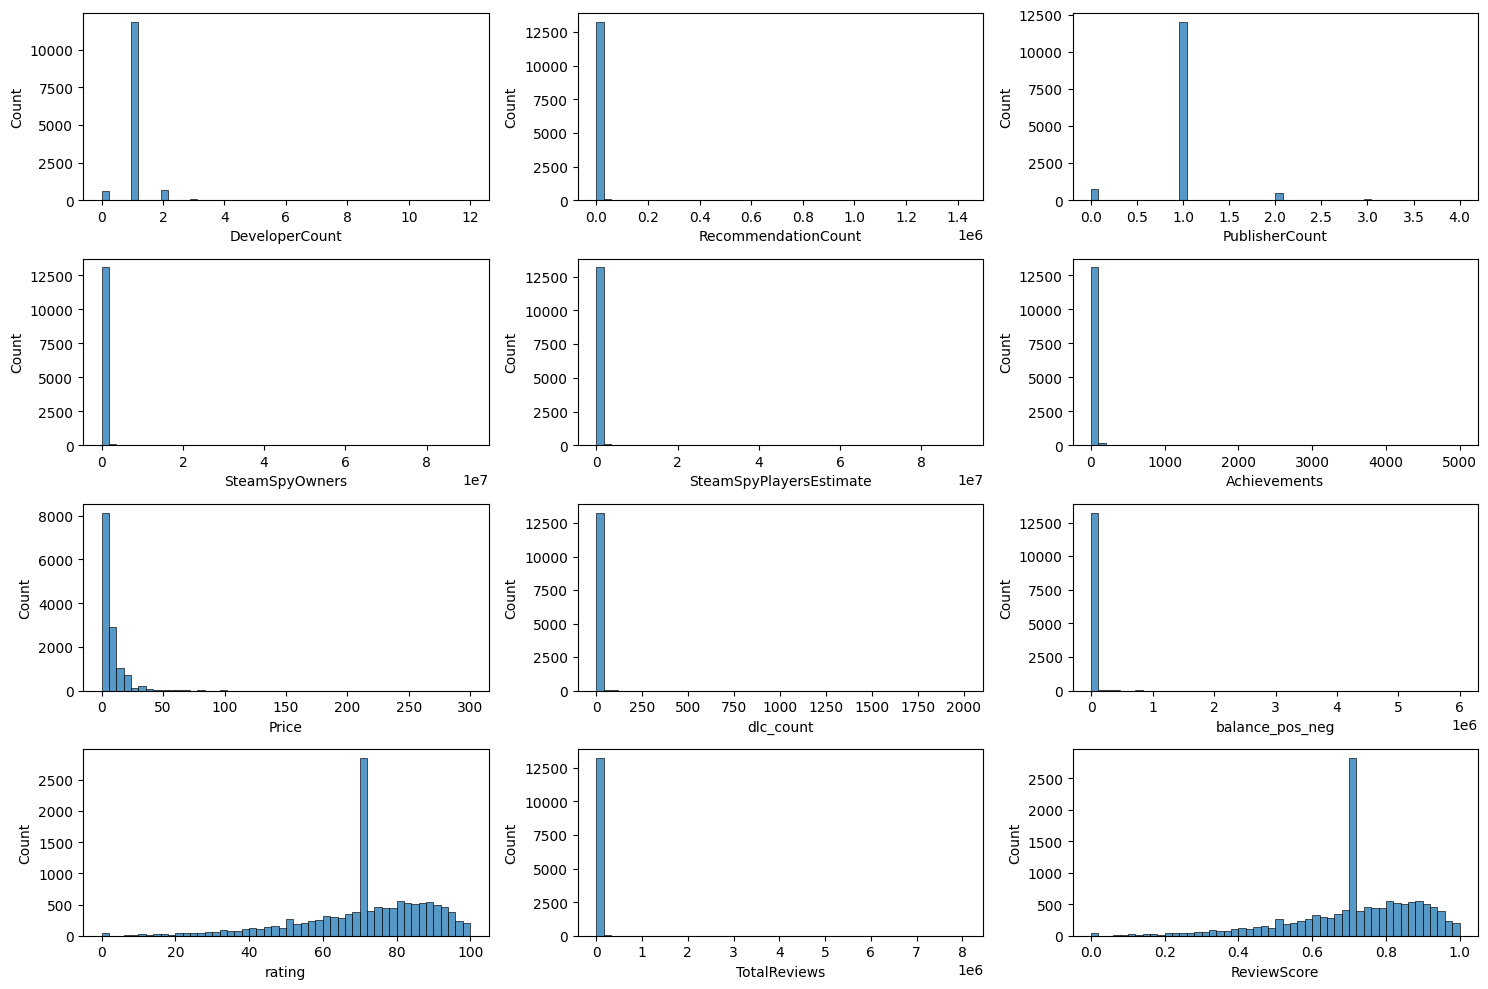

In [97]:
# Price
# dlc_count
# balance_pos_neg
# rating
# TotalReviews
# ReviewScore



scaling_feat = [
    'DeveloperCount',
    'RecommendationCount',
    'PublisherCount',
    'SteamSpyOwners',
    'SteamSpyPlayersEstimate',
    'Achievements',
    'Price',
    'dlc_count',
    'balance_pos_neg',
    'rating',
    'TotalReviews',
    'ReviewScore']

fig, axs = plt.subplots(4, 3, figsize=(15, 10))

axes = axs.flatten()

for ax, f in zip(axes, scaling_feat):
    sns.histplot(data=df_games, x=f, ax=ax, bins=50)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
# df_games[scaling_feat]

In [98]:
df_games[scaling_feat].describe()

,DeveloperCount,RecommendationCount,PublisherCount,SteamSpyOwners,SteamSpyPlayersEstimate,Achievements,Price,dlc_count,balance_pos_neg,rating,TotalReviews,ReviewScore
count,13303.000000,1.330300e+04,13303.000000,1.330300e+04,1.330300e+04,13303.000000,13303.000000,13303.000000,1.330300e+04,13303.000000,1.330300e+04,13303.000000
mean,1.032173,1.166527e+03,0.989476,1.633092e+05,1.058876e+05,16.616477,6.801839,0.963692,3.823994e+03,71.601834,5.051745e+03,0.716018
std,0.437341,1.518728e+04,0.337427,1.120906e+06,1.004352e+06,83.002123,8.997778,19.731572,6.228464e+04,17.316858,8.224975e+04,0.173169
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-2.884000e+03,0.000000,1.000000e+00,0.000000
25%,1.000000,0.000000e+00,1.000000,8.080000e+02,5.370000e+02,0.000000,0.000000,0.000000,1.500000e+01,64.577381,6.800000e+01,0.645774
50%,1.000000,0.000000e+00,1.000000,9.506000e+03,4.125000e+03,0.000000,4.990000,0.000000,8.100000e+01,71.601834,1.890000e+02,0.716018
75%,1.000000,2.410000e+02,1.000000,5.954400e+04,2.779900e+04,20.000000,9.990000,0.000000,2.755000e+02,84.080205,5.740000e+02,0.840802
max,12.000000,1.427633e+06,4.000000,9.068758e+07,9.068758e+07,5000.000000,299.900000,2006.000000,5.995057e+06,100.000000,8.054615e+06,1.000000


In [99]:
rob_feat = ['DeveloperCount',
    'RecommendationCount',
    'PublisherCount',
    'SteamSpyOwners',
    'SteamSpyPlayersEstimate',
    'Achievements',
    'Price',
    'dlc_count',
    'balance_pos_neg',
    'TotalReviews']

std_feat = ['rating', 'ReviewScore']

rob = RobustScaler()

std = StandardScaler()

df_games[rob_feat] = rob.fit_transform(df_games[rob_feat])
df_games[std_feat] = std.fit_transform(df_games[std_feat])

In [100]:
df_games.columns

Index(['DeveloperCount', 'RecommendationCount', 'PublisherCount',
       'SteamSpyOwners', 'SteamSpyPlayersEstimate', 'Achievements',
       'Adventure', 'Casual', 'Indie', 'RPG', 'Free To Play', 'Action',
       'Strategy', 'Simulation', 'Racing', 'Sports', 'Massively Multiplayer',
       'Education', 'Violent', 'Design & Illustration', 'Animation & Modeling',
       'Co-op', 'Cross-Platform Multiplayer', 'Family Sharing',
       'HDR available', 'In-App Purchases', 'Multi-player', 'VR Support',
       'age_ranking', 'Price', 'dlc_count', 'rating', 'TotalReviews',
       'ReviewScore', 'Sales', 'YearDifference', 'Month_sin', 'Month_cos',
       'balance_pos_neg', 'PurchaseAvail', 'CategorySinglePlayer'],
      dtype='object')

In [101]:
#df_games[['num_reviews_total', 'TotalReviews']]

In [102]:
df_games

,DeveloperCount,RecommendationCount,PublisherCount,SteamSpyOwners,SteamSpyPlayersEstimate,Achievements,Adventure,Casual,Indie,RPG,...,rating,TotalReviews,ReviewScore,Sales,YearDifference,Month_sin,Month_cos,balance_pos_neg,PurchaseAvail,CategorySinglePlayer
0,0.0,286.269710,0.0,221.735018,335.140709,0.00,0.0,0.0,0.0,0.0,...,1.493177,467.964427,1.493177,1.302030e+08,24.0,-5.000000e-01,0.866025,863.147793,1.0,0.0
1,0.0,10.120332,0.0,91.760317,27.492554,0.00,0.0,0.0,0.0,0.0,...,0.881945,15.721344,0.881945,2.694171e+07,25.0,8.660254e-01,-0.500000,22.744722,1.0,0.0
2,0.0,9.622407,0.0,129.589962,62.563825,0.00,0.0,0.0,0.0,0.0,...,1.071194,12.990119,1.071194,3.802930e+07,21.0,5.000000e-01,-0.866025,20.533589,1.0,0.0
3,0.0,3.684647,0.0,127.510539,28.814871,0.00,0.0,0.0,0.0,0.0,...,0.634449,5.460474,0.634449,3.741984e+07,23.0,1.224647e-16,-1.000000,7.074856,1.0,0.0
4,0.0,12.174274,0.0,91.766429,25.736043,0.00,0.0,0.0,0.0,0.0,...,1.362123,43.207510,1.362123,2.694350e+07,25.0,-5.000000e-01,0.866025,76.195777,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13298,0.0,0.000000,0.0,-0.161843,-0.151310,0.80,0.0,1.0,1.0,0.0,...,-0.092505,-0.314229,-0.092505,0.000000e+00,7.0,5.000000e-01,0.866025,-0.264875,0.0,1.0
13299,0.0,0.000000,0.0,-0.161843,-0.151310,0.00,0.0,0.0,0.0,0.0,...,1.377479,-0.330040,1.377479,0.000000e+00,8.0,-8.660254e-01,0.500000,-0.234165,0.0,1.0
13300,0.0,0.000000,0.0,-0.161843,-0.151310,0.00,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,NaN,8.0,-8.660254e-01,0.500000,0.000000,0.0,1.0
13301,0.0,0.000000,0.0,-0.161843,-0.151310,0.00,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,NaN,8.0,-8.660254e-01,0.500000,0.000000,0.0,1.0


In [103]:
from sklearn.preprocessing import MinMaxScaler


# Step 3: Scaling for 'positive' and 'negative'
scaler = MinMaxScaler()
df_games[['positive', 'negative']] = scaler.fit_transform(df_games[['positive', 'negative']])

# Step 4: Fill missing values for 'rating', 'TotalReviews', and 'ReviewScore', then apply scaling
df_games['rating'] = df_games['rating'].fillna(df_games['rating'].mean())
df_games['TotalReviews'] = df_games['TotalReviews'].fillna(df_games['TotalReviews'].median())
df_games['ReviewScore'] = df_games['ReviewScore'].fillna(df_games['ReviewScore'].mean())

# Scaling for rating, TotalReviews, and ReviewScore
df_games[['rating', 'TotalReviews', 'ReviewScore']] = scaler.fit_transform(df_games[['rating', 'TotalReviews', 'ReviewScore']])

# Display a summary of the updated dataframe to confirm changes
df_games[['positive', 'negative', 'rating', 'TotalReviews', 'ReviewScore']].head()


KeyError: "None of [Index(['positive', 'negative'], dtype='object')] are in the [columns]"

In [104]:
df_games.iloc[:,:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13303 entries, 0 to 13302
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DeveloperCount              13303 non-null  float64
 1   RecommendationCount         13303 non-null  float64
 2   PublisherCount              13303 non-null  float64
 3   SteamSpyOwners              13303 non-null  float64
 4   SteamSpyPlayersEstimate     13303 non-null  float64
 5   Achievements                13303 non-null  float64
 6   Adventure                   13303 non-null  float64
 7   Casual                      13303 non-null  float64
 8   Indie                       13303 non-null  float64
 9   RPG                         13303 non-null  float64
 10  Free To Play                13303 non-null  float64
 11  Action                      13303 non-null  float64
 12  Strategy                    13303 non-null  float64
 13  Simulation                  133

In [105]:
df_games.columns

Index(['DeveloperCount', 'RecommendationCount', 'PublisherCount',
       'SteamSpyOwners', 'SteamSpyPlayersEstimate', 'Achievements',
       'Adventure', 'Casual', 'Indie', 'RPG', 'Free To Play', 'Action',
       'Strategy', 'Simulation', 'Racing', 'Sports', 'Massively Multiplayer',
       'Education', 'Violent', 'Design & Illustration', 'Animation & Modeling',
       'Co-op', 'Cross-Platform Multiplayer', 'Family Sharing',
       'HDR available', 'In-App Purchases', 'Multi-player', 'VR Support',
       'age_ranking', 'Price', 'dlc_count', 'rating', 'TotalReviews',
       'ReviewScore', 'Sales', 'YearDifference', 'Month_sin', 'Month_cos',
       'balance_pos_neg', 'PurchaseAvail', 'CategorySinglePlayer'],
      dtype='object')

In [106]:
#df_games.to_csv("dfGames.csv")

In [107]:
temp_df_games= df_games.copy()

In [108]:
df_bool = temp_df_games[['Adventure','Casual','Indie','RPG','Free To Play','Action','Strategy','Simulation',
    'Racing','Sports','Massively Multiplayer','Education','Violent','Design & Illustration',
    'Animation & Modeling','Co-op','Cross-Platform Multiplayer','Family Sharing','HDR available',
    'In-App Purchases','Multi-player','VR Support']]
to_cinv = df_bool.columns.to_list()
df_bool = temp_df_games[to_cinv].astype(bool)
temp_df_games[to_cinv] = df_bool

In [109]:
temp_df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13303 entries, 0 to 13302
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DeveloperCount              13303 non-null  float64
 1   RecommendationCount         13303 non-null  float64
 2   PublisherCount              13303 non-null  float64
 3   SteamSpyOwners              13303 non-null  float64
 4   SteamSpyPlayersEstimate     13303 non-null  float64
 5   Achievements                13303 non-null  float64
 6   Adventure                   13303 non-null  bool   
 7   Casual                      13303 non-null  bool   
 8   Indie                       13303 non-null  bool   
 9   RPG                         13303 non-null  bool   
 10  Free To Play                13303 non-null  bool   
 11  Action                      13303 non-null  bool   
 12  Strategy                    13303 non-null  bool   
 13  Simulation                  133

In [110]:
#df_games.to_csv("games_newest2.csv")